# run cell 1

In [5]:
import numpy as np
from scipy.integrate import solve_ivp, quad
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"

R = 8.314  # gas constant in J/mol-K
def CpA(T):
    ''' CpA is the heat capacity of Methane in J/mol-K as a function of temperature in K'''
    #return -0.703029 + (108.4773 * (T / 1000)) - (42.52157 * (T / 1000)**2) + (5.862788 * (T / 1000)**3) + (0.678565 / ((T / 1000)**2))
    if T < 1300:
        return -0.703029 + (108.4773 * (T / 1000)) - (42.52157 * (T / 1000)**2) + (5.862788 * (T / 1000)**3) + (0.678565 / ((T / 1000)**2))
    else:
        return 85.81217 + (11.26467 * (T / 1000)) - (2.114146 * (T / 1000)**2) + (0.138190 * (T / 1000)**3) - (26.42221 / ((T / 1000)**2))

def CpB(T):
    ''' CpB is the heat capacity of Water in J/mol-K as a function of temperature in K'''
    return 30.09200 + (6.832514 * (T / 1000)) + (6.793435 * (T / 1000)**2) - (2.534480 * (T / 1000)**3) + (0.082139 / ((T / 1000)**2))

def CpC(T):
    ''' CpC is the heat capacity of Oxygen in J/mol-K as a function of temperature in K'''
    #return 30.03235 + (8.772972 * (T / 1000)) - (3.988133 * (T / 1000)**2) + (0.788313 * (T / 1000)**3) - (0.741599 / ((T / 1000)**2))
    if T < 700:
        return 31.32234 - (20.23532 * (T / 1000)) + (57.86644 * (T / 1000)**2) - (36.50624 * (T / 1000)**3) + (0.0007374 / ((T / 1000)**2))
    else:
        return 30.03235 + (8.772972 * (T / 1000)) - (3.988133 * (T / 1000)**2) + (0.788313 * (T / 1000)**3) - (0.741599 / ((T / 1000)**2))

def CpD(T):
    ''' CpD is the heat capacity of Carbon Monoxide in J/mol-K as a function of temperature in K'''
    #return 25.56759 + (6.09613 * (T / 1000)) + (4.054656 * (T / 1000)**2) - (2.671301 * (T / 1000)**3) + (0.131021 / ((T / 1000)**2))
    if T < 1300:
        return 25.56759 + (6.09613 * (T / 1000)) + (4.054656 * (T / 1000)**2) - (2.671301 * (T / 1000)**3) + (0.131021 / ((T / 1000)**2))
    else:
        return 35.15070 + (1.300095 * (T / 1000)) - (0.205921 * (T / 1000)**2) + (0.01355 * (T / 1000)**3) - (3.28278 / ((T / 1000)**2))

def CpE(T):
    ''' CpE is the heat capacity of Carbon Dioxide in J/mol-K as a function of temperature in K'''
    #return 24.99735 + (55.18696 * (T / 1000)) - (33.69137 * (T / 1000)**2) + (7.948387 * (T / 1000)**3) - (0.136638 / ((T / 1000)**2))
    if T < 1200:
        return 24.99735 + (55.18696 * (T / 1000)) - (33.69137 * (T / 1000)**2) + (7.948387 * (T / 1000)**3) - (0.136638 / ((T / 1000)**2))
    else:
        return 58.16639 + (2.720074 * (T / 1000)) - (0.492289 * (T / 1000)**2) + (0.038844 * (T / 1000)**3) - (6.447293 / ((T / 1000)**2))

def CpF(T):
    ''' CpF is the heat capacity of Hydrogen in J/mol-K as a function of temperature in K'''
    if T < 1000:
        return 33.066178 - (11.363417 * (T / 1000)) + (11.432816 * (T / 1000)**2) - (2.772874 * (T / 1000)**3) - (0.158558 / ((T / 1000)**2))
    else:
        return 18.563083 + (12.257357 * (T / 1000)) - (2.859786 * (T / 1000)**2) + (0.268238 * (T / 1000)**3) + (1.977990 / ((T / 1000)**2))
def CpG(T):
    ''' CpG is the heat capacity of Nitrogen in J/mol-K as a function of temperature in K'''
    #return 19.50583 + (19.88705 * (T / 1000)) - (8.598535 * (T / 1000)**2) + (1.369784 * (T / 1000)**3) + (0.527601 / ((T / 1000)**2))
    if T < 500:
        return 28.98641 + (1.853978 * (T / 1000)) - (9.647459 * (T / 1000)**2) + (16.63537 * (T / 1000)**3) + (0.000117 / ((T / 1000)**2))
    else:
        return 19.50583 + (19.88705 * (T / 1000)) - (8.598535 * (T / 1000)**2) + (1.369784 * (T / 1000)**3) + (0.527601 / ((T / 1000)**2))


def Hrxn1(T):
    integral_CpF = quad(CpF, 298, T)[0]
    integral_CpD = quad(CpD, 298, T)[0]
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpA = quad(CpA, 298, T)[0]
    return 206.2e3 + 3 * integral_CpF + integral_CpD - integral_CpB - integral_CpA

def Hrxn2(T):
    integral_CpF = quad(CpF, 298, T)[0]
    integral_CpE = quad(CpE, 298, T)[0]
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpA = quad(CpA, 298, T)[0]
    return 164.9e3 + 4 * integral_CpF + integral_CpE - 2 * integral_CpB - integral_CpA

def Hrxn3(T):
    integral_CpF = quad(CpF, 298, T)[0]
    integral_CpE = quad(CpE, 298, T)[0]
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpD = quad(CpD, 298, T)[0]
    return -41.1e3 + integral_CpF + integral_CpE - integral_CpB - integral_CpD

def Hrxn4(T):
    integral_CpB = quad(CpB, 298, T)[0]
    integral_CpE = quad(CpE, 298, T)[0]
    integral_CpC = quad(CpC, 298, T)[0]
    integral_CpA = quad(CpA, 298, T)[0]
    return -802.7e3 + 2 * integral_CpB + integral_CpE - 2 * integral_CpC - integral_CpA

def rates(T):
    k1 = 1.17e15 * np.exp(-240100 / (R * T))
    k2 = 2.83e14 * np.exp(-243900 / (R * T))
    k3 = 5.43e5 * np.exp(-67130 / (R * T))
    k4a = 8.11e5 * np.exp(-86000 / (R * T))
    k4b = 6.82e5 * np.exp(-86000 / (R * T))

    return k1, k2, k3, k4a, k4b

def Keqm(T):
    KI = np.exp(-26830 / T + 30.114) # equilibrium constant for steam reforming (reaction 1)
    KIII = np.exp(4400 / T - 4.036)  # equilibrium constant for water gas shift (reaction 3)
    KII = KI * KIII # equilibrium constant for steam reforming (reaction 2)
    return KI, KII, KIII

In [ ]:
T_span = [500 + 10*i for i in range(100)]
H1 = [Hrxn1(T)/1000 for T in T_span]
H2 = [Hrxn2(T)/1000 for T in T_span]
H3 = [Hrxn3(T)/1000 for T in T_span]
H4 = [Hrxn4(T)/1000 for T in T_span]

# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# axs[0, 0].plot(T_span, H1)
# axs[0, 0].set_title('Hrxn1')
# axs[0, 0].set_xlabel('Temperature (K)')
# axs[0, 0].set_ylabel('Enthalpy (J/mol)')
# axs[0, 1].plot(T_span, H2)
# axs[0, 1].set_title('Hrxn2')
# axs[0, 1].set_xlabel('Temperature (K)')
# axs[0, 1].set_ylabel('Enthalpy (J/mol)')
# axs[1, 0].plot(T_span, H3)
# axs[1, 0].set_title('Hrxn3')
# axs[1, 0].set_xlabel('Temperature (K)')
# axs[1, 0].set_ylabel('Enthalpy (J/mol)')
# axs[1, 1].plot(T_span, H4)
# axs[1, 1].set_title('Hrxn4')
# axs[1, 1].set_xlabel('Temperature (K)')
# axs[1, 1].set_ylabel('Enthalpy (J/mol)')
# plt.tight_layout()
for i in range(4):
    plt.figure()
    plt.plot(T_span, [H1, H2, H3, H4][i])
    plt.xlabel('Temperature (K)')
    plt.ylabel('Hrxn (kJ/mol)')
    plt.legend([f'Hrxn{i+1}'])
    plt.grid()
    plt.savefig(f'hrxn{i+1}.png', bbox_inches='tight')
plt.figure()
plt.plot(T_span, H1, label='Hrxn1')
plt.plot(T_span, H2, label='Hrxn2')
plt.plot(T_span, H3, label='Hrxn3')
plt.plot(T_span, H4, label='Hrxn4')
plt.xlabel('Temperature (K)')
plt.ylabel('Hrxn (kJ/mol)')
plt.grid()
plt.legend()
plt.savefig('hrxn.png')


In [ ]:
KI = [Keqm(T)[0] for T in T_span]
KII = [Keqm(T)[1] for T in T_span]
KIII = [Keqm(T)[2] for T in T_span]
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# axs[0].plot(T_span, KI)
# axs[0].set_title('KI')
# axs[0].set_xlabel('Temperature (K)')
# axs[0].set_ylabel('Equilibrium constant')
# axs[1].plot(T_span, KII)
# axs[1].set_title('KII')
# axs[1].set_xlabel('Temperature (K)')
# axs[1].set_ylabel('Equilibrium constant')
# axs[2].plot(T_span, KIII)
# axs[2].set_title('KIII')
# axs[2].set_xlabel('Temperature (K)')
# axs[2].set_ylabel('Equilibrium constant')
# plt.tight_layout()

for i in range(3):
    plt.figure()
    plt.plot(T_span, [KI, KII, KIII][i])
    plt.xlabel('Temperature (K)')
    plt.ylabel('Equilibrium Constant')
    plt.legend([f'K{"I"*(i+1)}'])
    plt.grid()
    plt.savefig(f'K{"I"*(i+1)}.png', bbox_inches='tight')

plt.figure()
plt.plot(T_span, KI, label='KI')
plt.plot(T_span, KII, label='KII')
plt.plot(T_span, KIII, label='KIII')
plt.xlabel('Temperature (K)')
plt.ylabel('Equilibrium Constant')
plt.legend()


In [ ]:
T_span = [500 + 10*i for i in range(100)]
Tinv = [1/T for T in T_span]
def lnrates(T):
    k1 = 1.17e15 * np.exp(-240100 / (R * T))
    k2 = 2.83e14 * np.exp(-243900 / (R * T))
    k3 = 5.43e5 * np.exp(-67130 / (R * T))
    k4a = 8.11e5 * np.exp(-86000 / (R * T))
    k4b = 6.82e5 * np.exp(-86000 / (R * T))

    # rewrite the rate constants in terms of ln(k) = ln(A) - E/RT
    lnk1 = np.log(1.17e15) - 240100 / (R * T)
    lnk2 = np.log(2.83e14) - 243900 / (R * T)
    lnk3 = np.log(5.43e5) - 67130 / (R * T)
    lnk4a = np.log(8.11e5) - 86000 / (R * T)
    lnk4b = np.log(6.82e5) - 86000 / (R * T)
    return lnk1, lnk2, lnk3, lnk4a, lnk4b
plt.figure()
# plot ln(k) vs 1/T
lnk1 = [lnrates(T)[0] for T in T_span]
lnk2 = [lnrates(T)[1] for T in T_span]
lnk3 = [lnrates(T)[2] for T in T_span]
lnk4a = [lnrates(T)[3] for T in T_span]
lnk4b = [lnrates(T)[4] for T in T_span]

plt.plot(Tinv, lnk1, label='ln k1')
plt.plot(Tinv, lnk2, label='ln k2')
plt.plot(Tinv, lnk3, label='ln k3')
plt.plot(Tinv, lnk4a, label='ln k4a')
plt.plot(Tinv, lnk4b, label='ln k4b')
plt.xlabel('1/T (1/K)')
plt.ylabel('ln rate constant')
plt.grid()
plt.legend()
# fig, axs = plt.subplots(1, 5, figsize=(20, 5))
# axs[0].plot(Tinv, lnk1)
# axs[0].set_title('ln k1')
# axs[0].set_xlabel('1/T (1/K)')
# axs[0].set_ylabel('ln rate constant')
# axs[1].plot(Tinv, lnk2)
# axs[1].set_title('ln k2')
# axs[1].set_xlabel('1/T (1/K)')
# axs[1].set_ylabel('ln rate constant')
# axs[2].plot(Tinv, lnk3)
# axs[2].set_title('ln k3')
# axs[2].set_xlabel('1/T (1/K)')
# axs[2].set_ylabel('ln rate constant')
# axs[3].plot(Tinv, lnk4a)
# axs[3].set_title('ln k4a')
# axs[3].set_xlabel('1/T (1/K)')
# axs[3].set_ylabel('ln rate constant')
# axs[4].plot(Tinv, lnk4b)
# axs[4].set_title('ln k4b')
# axs[4].set_xlabel('1/T (1/K)')
# axs[4].set_ylabel('ln rate constant')
# plt.tight_layout()

# for i in range(5):
#     plt.figure()
#     plt.plot(Tinv, [lnk1, lnk2, lnk3, lnk4a, lnk4b][i])
#     plt.xlabel('1/T (1/K)')
#     plt.ylabel('ln rate constant')
#     if i == 4:
#         plt.legend([f'ln k4a'])
#     elif i == 5:
#         plt.legend([f'ln k4b'])
#     else:
#         plt.legend([f'ln k{i+1}'])
#     plt.grid()
#     plt.savefig(f'lnk{i+1}.png', bbox_inches='tight')



In [71]:
def shift_ode(w, F):
    # isothermal, isobaric
    FCH4, FH2O, FO2, FCO, FCO2, FH2, FN2, T, P = F
    FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2

    # Partial pressures
    pCH4 = (FCH4 / FT) * P
    pH2O = (FH2O / FT) * P
    pO2 = (FO2 / FT) * P
    pCO = (FCO / FT) * P
    pCO2 = (FCO2 / FT) * P
    pH2 = (FH2 / FT) * P
    pN2 = (FN2 / FT) * P

    # Constants
    R = 8.314  # J/mol-K

    # Rate constants
    k1, k2, k3, k4a, k4b = rates(T)
    KI, KII, KIII = Keqm(T)

    # Adsorption equilibrium constants
    KCH4 = 6.65e-4 * np.exp(38280 / (R * T))
    KCO = 8.23e-5 * np.exp(70650 / (R * T))
    KH2 = 6.12e-9 * np.exp(82900 / (R * T))
    KH2O = 1.77e5 * np.exp(-88680 / (R * T))
    sigma = 1 + KCH4 * pCH4 + KCO * pCO + KH2 * pH2 + KH2O * (pH2O / pH2)

    # Reaction rates
    rate1 = (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
    rate2 = (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2
    rate3 = (k3 / pH2) * (pCO * pH2O - pH2 * pCO2 / KIII) / sigma**2
    rate4 = (k4a * pCH4 * pO2 / sigma**2 + k4b * pCH4 * pO2 / sigma)

    # Differential equations
    dFdw = np.zeros(9)
    dFdw[0] = -rate1 - rate2 - rate4  # CH4
    dFdw[1] = -rate1 - 2 * rate2 - rate3 + 2 * rate4  # H2O
    dFdw[2] = -rate4  # O2
    dFdw[3] = rate1 - rate3  # CO
    dFdw[4] = rate2 + rate3  # CO2
    dFdw[5] = 3 * rate1 + 4 * rate2 + rate3  # H2
    dFdw[6] = 0  # N2 (inert)
    dFdw[7] = 0  # Temperature (no dynamic update here)
    dFdw[8] = 0  # Pressure (no dynamic update here)
    return dFdw

In [ ]:
# Initial conditions
T_list = [848, 823, 798, 773] 
# Integration range
w_span = [0, 2.2]  # Catalyst weight range, corresponds to 0.0004
for T in T_list:
    F0 = [1 / 3600, 3 / 3600, 0, 0, 0, 1.25 / 3600, 0, T, 10]
    sol = solve_ivp(shift_ode, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    w = sol.t # Catalyst weight (kg)
    # covert to grams
    w = w * 1000
    F = sol.y.T
    # get conversion
    FCH4 = F[:, 0]
    FCH4in = F0[0]
    X = (FCH4in - FCH4) / FCH4in
    # Plot
    plt.plot(w, X, label='T = {} K'.format(T))
    plt.xlabel('Catalyst weight (g)')
    plt.ylabel('Methane Conversion')
    plt.grid()
    plt.legend()
    plt.savefig('conversion.png', bbox_inches='tight')

In [11]:
def shiftb(w, F):
    FCH4, FH2O, FO2, FCO, FCO2, FH2, FN2, T, P = F
    FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2

    # Partial pressures of each species
    pCH4 = (FCH4 / FT) * P
    pH2O = (FH2O / FT) * P
    pO2 = (FO2 / FT) * P
    pCO = (FCO / FT) * P
    pCO2 = (FCO2 / FT) * P
    pH2 = (FH2 / FT) * P
    pN2 = (FN2 / FT) * P

    k1, k2, k3, k4a, k4b = rates(T)
    KI, KII, KIII = Keqm(T)

    # Adsorption equilibrium constants
    KCH4 = 6.65e-4 * np.exp(38280 / (R * T))
    KCO = 8.23e-5 * np.exp(70650 / (R * T))
    KH2 = 6.12e-9 * np.exp(82900 / (R * T))
    KH2O = 1.77e5 * np.exp(-88680 / (R * T))
    sigma = 1 + KCH4 * pCH4 + KCO * pCO + KH2 * pH2 + KH2O * (pH2O / pH2)

    KC_CH4 = 1.26e-1 * np.exp(27300 / (R * T))
    KC_O2 = 7.78e-7 * np.exp(92800 / (R * T))
    sigma1 = 1 + KC_CH4 * pCH4 + KC_O2 * pO2

    FtCp = FCH4 * CpA(T) + FH2O * CpB(T) + FO2 * CpC(T) + FCO * CpD(T) + FCO2 * CpE(T) + FH2 * CpF(T) + FN2 * CpG(T)

    # Rate expressions for each reaction
    rate1 = 0.07 * (k1 / (pH2**2.5)) * (pCH4 * pH2O - ((pH2**3) * pCO) / KI) / (sigma**2)
    rate2 = 0.06 * (k2 / (pH2**3.5)) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / (sigma**2)
    rate3 = 0.7 * (k3 / pH2) * (pCO * pH2O - pH2 * pCO2 / KIII) / (sigma**2)
    rate4 = 0.05 * (k4a * pCH4 * pO2 / sigma1**2 + k4b * pCH4 * pO2 / sigma1)

    # Differential equations (species balances)
    dFdw = np.zeros(9)
    # Methane
    dFdw[0] = -rate1 - rate2 - rate4
    # Water (H2O)
    dFdw[1] = -rate1 - 2 * rate2 - rate3 + 2 * rate4
    # Oxygen (O2)
    dFdw[2] = -2 * rate4
    #dFdw[2] = - rate4
    # Carbon monoxide (CO)
    dFdw[3] = rate1 - rate3
    # Carbon dioxide (CO2)
    dFdw[4] = rate2 + rate3 + rate4
    #dFdw[4] = rate2 + rate3
    # Hydrogen (H2)
    dFdw[5] = 3 * rate1 + 4 * rate2 + rate3
    # Nitrogen (N2)
    dFdw[6] = 0
    #Temperature change (non-isothermal case)
    dFdw[7] = (-rate1 * Hrxn1(T) - rate2 * Hrxn2(T) - rate3 * Hrxn3(T) - rate4 * Hrxn4(T)) / FtCp
    #Pressure change
    dFdw[8] = 0

    return dFdw

In [ ]:
F0 = [0.1, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 14]
sol = solve_ivp(shiftb, [0, 1.5], F0, method='LSODA', rtol=1e-6, atol=1e-9)
F = sol.y.T
w = sol.t
T = F[:, 7]
plt.plot(w, T)
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Temperature (K)')
plt.grid()
plt.savefig('temperature.png', bbox_inches='tight')


# Run the next cell 

In [30]:

def visc(y, T):
    # Constants
    Mw = np.array([16.043, 44.01, 28.01, 18.015, 2.016, 28.014, 31.999])
    Vc = np.array([98.6, 94.07, 93.1, 55.95, 65.00, 90.1, 73.37])
    Tc = np.array([190.56, 304.12, 132.85, 647.14, 33.25, 126.2, 154.58])
    w = np.array([0.011, 0.225, 0.045, 0.344, -0.216, -0.037, 0])
    dip = np.array([0.0, 0.0, 0.1, 1.8, 0, 0, 0])
    kap = np.array([0, 0, 0, 0.076, 0, 0, 0])
    # Normalize to get mole fractions
    y = y / np.sum(y)
    # Calculate individual species viscosities
    Tstar = 1.2593 * T / Tc
    dipr = 131.1 * dip / np.sqrt(Vc * Tc)
    fc = 1 - 0.2756 * w + 0.059035 * dipr**4 + kap
    ohm = 1.16145 * Tstar**-0.14874 + 0.52487 * np.exp(-0.77320 * Tstar) + 2.16178 * np.exp(-2.43787 * Tstar)
    vct = Vc**(2/3)
    visc = 40.785 * fc * (Mw * T)**0.5 / (vct * ohm)
    # Calculate mixture viscosity
    phi = np.zeros((len(y), len(y)))
    for i in range(len(y)):
        for j in range(len(y)):
            term1 = (visc[i] / visc[j])**0.5
            term2 = (Mw[j] / Mw[i])**0.25
            term3 = Mw[i] / Mw[j]
            phi[i, j] = (1 + term1 * term2)**2 / (8 * (1 + term3))**0.5

    sumb = 0
    for i in range(len(y)):
        suma = 0
        for j in range(len(y)):
            suma += y[j] * phi[i, j]
        sumb += y[i] * visc[i] / suma

    viscm = sumb * 1e-6 / 10 # Convert to Pascals-seconds
    return viscm

def shiftc(w, F):
    FCH4, FH2O, FO2, FCO, FCO2, FH2, FN2, T, P = F
    FT = FCH4 + FH2O + FO2 + FCO + FCO2 + FH2 + FN2

    # Partial pressures of each species
    pCH4 = (FCH4 / FT) * P
    pH2O = (FH2O / FT) * P
    pO2 = (FO2 / FT) * P
    pCO = (FCO / FT) * P
    pCO2 = (FCO2 / FT) * P
    pH2 = (FH2 / FT) * P
    pN2 = (FN2 / FT) * P

    k1, k2, k3, k4a, k4b = rates(T)
    KI, KII, KIII = Keqm(T)

    # Adsorption equilibrium constants
    KCH4 = 6.65e-4 * np.exp(38280 / (R * T))
    KCO = 8.23e-5 * np.exp(70650 / (R * T))
    KH2 = 6.12e-9 * np.exp(82900 / (R * T))
    KH2O = 1.77e5 * np.exp(-88680 / (R * T))
    sigma = 1 + KCH4 * pCH4 + KCO * pCO + KH2 * pH2 + KH2O * (pH2O / pH2)

    KC_CH4 = 1.26e-1 * np.exp(27300 / (R * T))
    KC_O2 = 7.78e-7 * np.exp(92800 / (R * T))
    sigma1 = 1 + KC_CH4 * pCH4 + KC_O2 * pO2

    FtCp = FCH4 * CpA(T) + FH2O * CpB(T) + FO2 * CpC(T) + FCO * CpD(T) + FCO2 * CpE(T) + FH2 * CpF(T) + FN2 * CpG(T)

    # Pressure drop equation
    por = 0.4  # porosity
    Dtube = 1 * 0.0254  # in meters (1-inch tube diameter)
    Dp = 2e-3  # diameter of spherical catalyst in meters
    epsilon = por
    rhocat = 1870  # kg_cat/m^3
    mdot = (FCH4 * 16 + FH2O * 18 + FO2 * 32 + FCO * 28 + FCO2 * 44 + FH2 * 2 + FN2 * 28) / 1000  # in kg/s
    Area = np.pi * Dtube**2 / 4  # m^2 cross-sectional area of tube
    G = mdot / Area  # mass flux in kg/m^2-s
    y = np.array([FCH4, FCO2, FCO, FH2O, FH2, FN2, FO2])
    viscm = visc(y,T)
    MWavg = (FCH4 * 16 + FH2O * 18 + FO2 * 32 + FCO * 28 + FCO2 * 44 + FH2 * 2 + FN2 * 28) / FT
    rho = ((P * 1e5) * MWavg) / (R * T)/ 1000  # density in kg/m^3
    Um = G / rho  # superficial velocity in m/s
    term1 = 150 * (1 - epsilon)**2 / (epsilon**3) * viscm * Um / Dp**2
    term2 = 1.75 * (1 - epsilon) / (epsilon**3) * (G * Um / Dp)
    
    # Conversion factor for dz to dw
    conv_factor = Area * rhocat * (1 - epsilon)
    dPdw = -(term1 + term2) / conv_factor / 1e5  # dP/dw in bars
    rate1 = 0
    rate2 = 0
    rate3 = 0
    rate4 = 0
    # Rate expressions for each reaction
    if sigma > 0:
        rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
        rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2
        rate3 = 0.7 * (k3 / pH2) * (pCO * pH2O - pH2 * pCO2 / KIII) / sigma**2
        rate4 = 0.05 * (k4a * pCH4 * pO2 / sigma1**2 + k4b * pCH4 * pO2 / sigma1)
    else:
        print('KCH4: ', KCH4, 'KCO: ', KCO, 'KH2: ', KH2, 'KH2O: ', KH2O, 'sigma: ', sigma, 'KC_CH4: ', KC_CH4, 'KC_O2: ', KC_O2, 'sigma1: ', sigma1, 'T: ', T, 'P: ', P, 'F: ', F, 'FT: ', FT, 'pCH4: ', pCH4, 'pH2O: ', pH2O, 'pO2: ', pO2, 'pCO: ', pCO, 'pCO2: ', pCO2, 'pH2: ', pH2, 'pN2: ', pN2, 'k1: ', k1, 'k2: ', k2, 'k3: ', k3, 'k4a: ', k4a, 'k4b: ', k4b, 'KI: ', KI, 'KII: ', KII, 'KIII: ', KIII, 'viscm: ', viscm, 'MWavg: ', MWavg, 'rho: ', rho, 'Um: ', Um, 'term1: ', term1, 'term2: ', term2, 'dPdw: ', dPdw)

    # Differential equations (species balances)
    dFdw = np.zeros_like(F)

    # Methane
    dFdw[0] = -rate1 - rate2 - rate4

    # Water (H2O)
    dFdw[1] = -rate1 - 2 * rate2 - rate3 + 2 * rate4

    # Oxygen (O2)
    dFdw[2] = -2*rate4
    #dFdw[2] = -rate4

    # Carbon monoxide (CO)
    dFdw[3] = rate1 - rate3

    # Carbon dioxide (CO2)
    dFdw[4] = rate2 + rate3 + rate4
    #dFdw[4] = rate2+rate3

    # Hydrogen (H2)
    dFdw[5] = 3 * rate1 + 4 * rate2 + rate3

    # Nitrogen (N2)
    dFdw[6] = 0

    #Temperature change (non-isothermal case)
    dFdw[7] = (-rate1 * Hrxn1(T) - rate2 * Hrxn2(T) - rate3 * Hrxn3(T) - rate4 * Hrxn4(T)) / FtCp

    #Pressure change
    dFdw[8] = dPdw

    return dFdw

KCH4:  nan KCO:  nan KH2:  nan KH2O:  nan sigma:  nan KC_CH4:  nan KC_O2:  nan sigma1:  nan T:  nan P:  4.66164899549095e-08 F:  [           nan            nan 4.56639164e-02            nan
            nan            nan 1.88000000e-01            nan
 4.66164900e-08] FT:  nan pCH4:  nan pH2O:  nan pO2:  nan pCO:  nan pCO2:  nan pH2:  nan pN2:  nan k1:  nan k2:  nan k3:  nan k4a:  nan k4b:  nan KI:  nan KII:  nan KIII:  nan viscm:  nan MWavg:  nan rho:  nan Um:  nan term1:  nan term2:  nan dPdw:  nan


C:\Users\immyh\AppData\Local\Temp\ipykernel_34664\4250486142.py:92: RuntimeWarning: invalid value encountered in scalar power
  rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
C:\Users\immyh\AppData\Local\Temp\ipykernel_34664\4250486142.py:93: RuntimeWarning: invalid value encountered in scalar power
  rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2


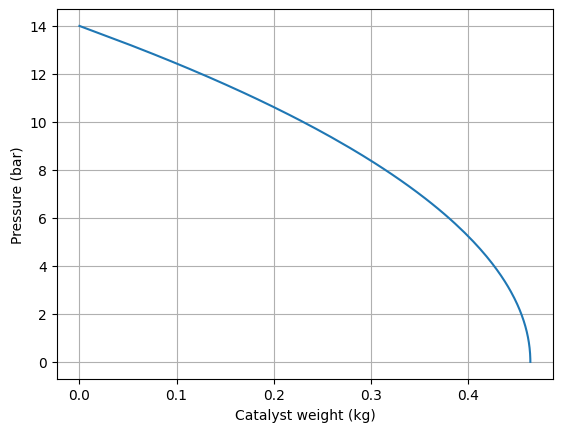

In [31]:
F0 = [0.1, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 14]
w_span = [0, 0.5]  # Catalyst weight range to 0.5kg
sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
w = sol.t # Catalyst weight (kg)
w = w 
F = sol.y.T
P = F[:, 8]
if np.any(P == None):
    print('Pressure is negative')
plt.plot(w, P)
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Pressure (bar)')
plt.grid()
plt.savefig('pressure.png', bbox_inches='tight')

In [ ]:
import numpy as np
import random
from deap import base, creator, tools, algorithms
w_span = [0, 2.273]
# Define the fitness function (lower is better)
def evaluate(individual):
    # Solve the ODE system with the given initial conditions
    F0 = individual
    # Penalize if F0[0] or F0[1] is zero
    if individual[0] == 0 or individual[1] == 0:
        fitness += 100  # Adjust the penalty weight as needed
        return float('inf')
    sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    F = sol.y.T
    # Calculate the objective function (maximize X)
    X = (F0[0] - F[:, 0]) / F0[0]
    fitness = -np.mean(X)  # Negative to minimize, maximizing X
    P = F[:, 8]
    T = F[:, 7]

    # Calculate fitness based on constraints and desired behavior
    fitness = 0
    # Add penalty terms for constraint violations
    if np.any(T >= 1500):
        fitness += 100
    if np.any(P <= 0):
        fitness += 1000

    return fitness,

# Create the DEAP toolbox
toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
num_initial_conditions = 9  # Adjust as needed
F0 = [0] * num_initial_conditions
# Initialize the population
def create_individual():
    F0 = [0] * num_initial_conditions
    for i in range(6):
        F0[i] = random.uniform(0, 1.5)
    F0[6] = random.uniform(10, 60)
    F0[7] = random.uniform(800, 1500)
    return creator.Individual(F0)

toolbox.register("individual", create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic operators
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Main evolutionary algorithm
pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

# Best solution
best_individual = hof[0]
best_F0 = list(best_individual)


In [67]:
# Initial conditions
from scipy.integrate import solve_ivp, quad
T_list = [848, 823, 798, 773] 
# Integration range
w_span = [0, 0.0004]  # Catalyst weight range, corresponds to 0.0004
for T in T_list:
    F0 = [1 / 3600, 3 / 3600, 0, 0, 0, 1.25 / 3600, 0, 800, P]
    sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    w = sol.t # Catalyst weight (kg)
    # covert to grams
    w = w * 1000
    F = sol.y.T
    # get conversion
    FCH4 = F[:, 0]
    FCH4in = F0[0]
    X = (FCH4in - FCH4) / FCH4in
    Pr = F[:, 8]
    # Plot
    plt.plot(w, Pr, label='T = {} K'.format(T))
    plt.xlabel('Catalyst weight (g)')
    plt.ylabel('Methane Conversion')
    plt.grid()
    plt.legend()
    plt.savefig('conversion.png', bbox_inches='tight')

C:\Users\immyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_ivp\base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)


ValueError: setting an array element with a sequence.

ValueError: x and y must have same first dimension, but have shapes (38,) and (566,)

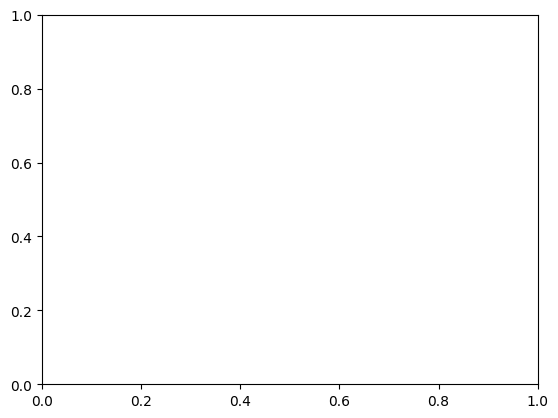

In [69]:
T_list = [848, 823, 798, 773] 
# for i in range(4):
#     P = 10 + 8 * i
# F0 = [0.05, 0.15, 0.05, 0, 0, 0.001, 0.188, 900, 14]
# sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9, first_step=1e-20)
# w = sol.t # Catalyst weight (kg)
# # covert to grams
# F = sol.y.T
# # get conversion
# FCH4 = F[:, 0]
# print(FCH4)
# FCH4in = F0[0]
# X = (FCH4in - FCH4) / FCH4in
# Tr = F[:, 7]
# Pr = F[:, 8]
# plt.plot(w, X)

for i in range(4):
    ws = 0.0004+0.0001*i
    w_span = [0, ws]
    F0 = [1 / 3600, 3 / 3600, 0, 0, 0, 1.25 / 3600, 0, 848, 10]
    sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    w = sol.t # Catalyst weight (kg)
    X = (FCH4in - FCH4) / FCH4in
    plt.plot(w, X)
# print(w)
# # Plot
# plt.plot(w, X, label='P = {} bar'.format(P))
# plt.xlabel('Catalyst weight (kg)')
# plt.ylabel('Methane Conversion')
# plt.grid()
# plt.savefig('conversion.png', bbox_inches='tight')

C:\Users\immyh\AppData\Local\Temp\ipykernel_29432\2103608543.py:109: RuntimeWarning: invalid value encountered in double_scalars
  rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
C:\Users\immyh\AppData\Local\Temp\ipykernel_29432\2103608543.py:110: RuntimeWarning: invalid value encountered in double_scalars
  rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2


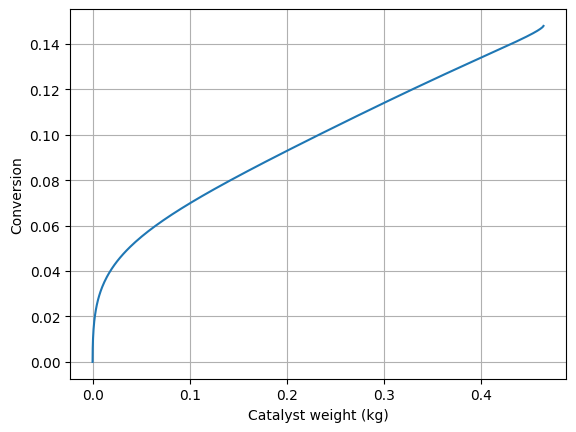

In [ ]:
F0 = [0.1, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 14]
w_span = [0, 0.8]  # Catalyst weight range to 0.5kg
sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
w = sol.t # Catalyst weight (kg)
w = w 
F = sol.y.T
P = F[:, 8]
X = (F0[0] - F[:, 0]) / F0[0]
#plt.plot(w, P)
plt.plot(w, X)
plt.xlabel('Catalyst weight (kg)')
plt.ylabel('Conversion')
plt.grid()

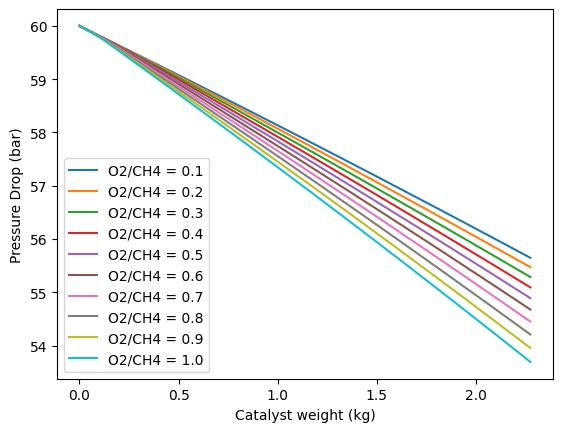

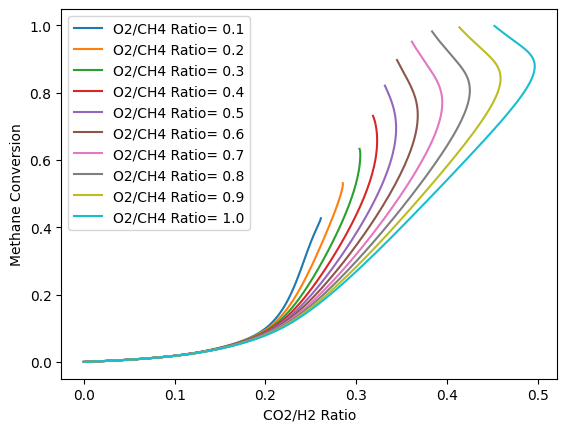

In [ ]:
w_span = [0, 2.274]  # Catalyst weight range to 0.5kg
# vary pressure
# for i in range(1,5):
#     P = 10 + 8*i
#     F0 = [0.1, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, P]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     F = sol.y.T
#     Pr = F[:, 8]
#     X = (F0[0] - F[:, 0]) / F0[0]
#     plt.plot(w, X, label = f'P = {P} bar')
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Conversion')
#     plt.grid()
#     plt.legend()
# plt.savefig('varyingpressure.png', bbox_inches='tight')
# vary flow rate
# for i in range(0,10):
#     flow = 0.01 + 0.01*i
#     F0 = [flow, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 42]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     F = sol.y.T
#     Pr = F[:, 8]
#     X = (F0[0] - F[:, 0]) / F0[0]
#     # display 2 decimal places
#     flow = round(flow, 2)
#     plt.plot(w, X, label = f'CH4 flow rate = {flow} mol/s')
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Methane conversion')
#     plt.grid()
#     plt.legend()
# plt.savefig('conversion.png', bbox_inches='tight')
# check pressure drop
# for i in range(0,5):
#     flow = 0.01 + 0.01*i
#     F0 = [flow, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 42]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     F = sol.y.T
#     Pr = F[:, 8]
#     X = (F0[0] - F[:, 0]) / F0[0]
#     plt.plot(w, Pr, label = 'CH4 flow rate = {} mol/s'.format(flow))
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Pressure (bar)')
#     plt.grid()
#     plt.legend()
# plt.savefig('pressuredrop.png', bbox_inches='tight')
# vary temperature to see effect on pressure drop
# for i in range(0,7):
#     T = 800 + 100*i
#     F0 = [0.01, 0.15, 0.05, 0, 0, 0.001, 0.188, T, 42]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     F = sol.y.T
#     Pr = F[:, 8]
#     X = (F0[0] - F[:, 0]) / F0[0]
#     plt.plot(w, Pr, label = 'Inlet Temp = {} K'.format(T))
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Pressure Drop (bar)')
#     plt.grid()
#     plt.legend()
# plt.savefig('tempdrop.png', bbox_inches='tight')

# vary temperature to see effect on conversion
# for i in range(0,10):
#     T = 500 + 100*i
#     F0 = [0.01, 0.15, 0.05, 0, 0, 0.001, 0.188, T, 42]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     F = sol.y.T
#     Pr = F[:, 8]
#     X = (F0[0] - F[:, 0]) / F0[0]
#     plt.plot(w, X, label = 'Inlet Temp = {} K'.format(T))
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Methane Conversion')
#     plt.grid()
#     plt.legend()
# plt.savefig('tempconversion.png', bbox_inches='tight')
# for i in range(0,5):
#     T = 800 + 50*i
#     F0 = [0.01, 0.15, 0.05, 0, 0, 0.001, 0.188, T, 42]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     F = sol.y.T
#     Tr = F[:, 7]
#     X = (F0[0] - F[:, 0]) / F0[0]
#     plt.plot(w, Tr, label = 'Inlet Temp = {} K'.format(T))
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Temperature (K)')
#     plt.grid()
#     plt.legend()

# explore effect of O2/C ratio on conversion
# for i in range(0,5):
#     O2 = 0.01 + 0.02*i
#     F0 = [0.01, 0.15, O2, 0, 0, 0.001, 0.188, 800, 60]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     F = sol.y.T
#     Pr = F[:, 8]
#     X = (F0[0] - F[:, 0]) / F0[0]
#     O2C_ratio = round(O2 / F0[0], 2)
#     plt.plot(w, X, label = 'O2/CH4 = {}'.format(O2C_ratio))
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Methane Conversion')
#     plt.grid()
#     plt.legend()
# explore effect of O2/C ratio on pressure drop
for i in range(0,10):
    O2 = 0.001 + 0.001*i
    F0 = [0.01, 0.15, O2, 0, 0, 0.001, 0.188, 800, 60]
    sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    w = sol.t # Catalyst weight (kg)
    F = sol.y.T
    Pr = F[:, 8]
    X = (F0[0] - F[:, 0]) / F0[0]
    O2C_ratio = round(O2 / F0[0], 2)
    plt.plot(w, Pr, label = 'O2/CH4 = {}'.format(O2C_ratio))
    plt.xlabel('Catalyst weight (kg)')
    plt.ylabel('Pressure Drop (bar)')
    plt.grid()
    plt.legend()
plt.figure()
# explore effect of O2/C ratio on CO2/H2 ratio
for i in range(0,10):
    O2 = 0.001 + 0.001*i
    F0 = [0.01, 0.15, O2, 0, 0, 0.001, 0.188, 800, 60]
    sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    w = sol.t # Catalyst weight (kg)
    F = sol.y.T
    X = (F0[0] - F[:, 0]) / F0[0]
    O2C_ratio = round(O2 / F0[0], 2)
    CO2H2_ratio = F[:, 4] / F[:, 5]
    plt.plot(CO2H2_ratio, X, label = 'O2/CH4 Ratio= {}'.format(O2C_ratio))
    plt.xlabel('CO2/H2 Ratio')
    plt.ylabel('Methane Conversion')
    plt.grid()
    plt.legend()
# explore pressure effect on conversion at T = 800 K
# for i in range(0,6):
#     P = 42 + 3*i
#     F0 = [0.01, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, P]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     F = sol.y.T
#     Pr = F[:, 8]
#     X = (F0[0] - F[:, 0]) / F0[0]
#     plt.plot(w, X, label = 'Inlet Pressure = {} bar'.format(P))
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Methane Conversion')
#     plt.grid()
#     plt.legend()
# check pressure drop
# for i in range(0,7):
#     P = 42 + 3*i
#     F0 = [0.01, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, P]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     F = sol.y.T
#     T = F[:, 7]
#     Pr = F[:, 8]
#     X = (F0[0] - F[:, 0]) / F0[0]
#     plt.plot(w, Pr, label = 'Inlet Pressure = {} bar'.format(P))
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Pressure (bar)')
#     plt.grid()
#     plt.legend(loc='lower left')



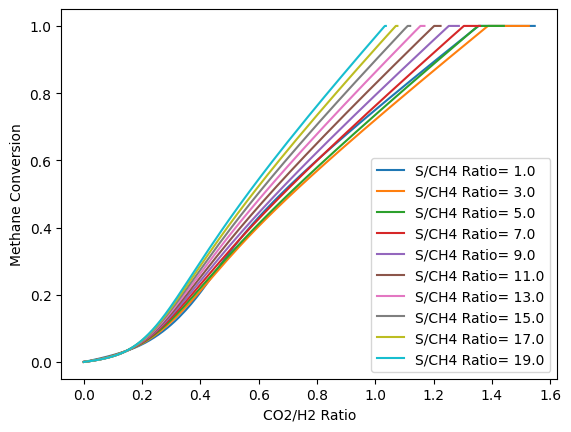

In [ ]:
# explore effect of S/C ratio on CO2/H2 ratio
for i in range(0,10):
    S = 0.01 + 0.02*i
    F0 = [0.01, S, 0.05, 0, 0, 0.001, 0.188, 800, 60]
    sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    w = sol.t # Catalyst weight (kg)
    F = sol.y.T
    X = (F0[0] - F[:, 0]) / F0[0]
    SC_ratio = round(S / F0[0], 2)  
    CO2H2_ratio = F[:, 4] / F[:, 5]
    plt.plot(CO2H2_ratio, X, label = 'S/CH4 Ratio= {}'.format(SC_ratio))
    plt.xlabel('CO2/H2 Ratio')
    plt.ylabel('Methane Conversion')
    plt.grid()
    plt.legend()

C:\Users\immyh\AppData\Local\Temp\ipykernel_29432\2103608543.py:109: RuntimeWarning: invalid value encountered in double_scalars
  rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
C:\Users\immyh\AppData\Local\Temp\ipykernel_29432\2103608543.py:110: RuntimeWarning: invalid value encountered in double_scalars
  rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2


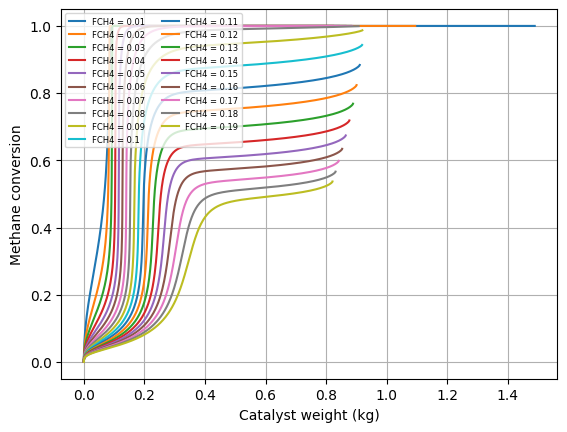

In [ ]:
w_span = [0, 2.274]
sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
for i in range(1,  10):
    F0 = [i / 100, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 25]
    sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    w = sol.t # Catalyst weight (kg)
    plt.plot(w, (F0[0] - sol.y.T[:, 0]) / F0[0], label=f'FCH4 = {i/100}')
    plt.xlabel('Catalyst weight (kg)')
    plt.ylabel('Methane conversion')
    plt.legend(loc=2, prop={'size': 6}, ncol=2)
    plt.grid()

# for i in range(1, 11):
#     F0 = [i / 1000, 0.05/100000, 0.05/100000, 0, 0, 0.001/100000, 0.188/100000, 800, 14]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     P = sol.y.T[:, 8]
#     plt.plot(w, P, label=f'FCH4 = {i/1000}')
#     #plt.plot(w, (F0[0] - sol.y.T[:, 0]) / F0[0], label=f'FCH4 = {i/1000}')
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Pressure')
#     plt.legend(loc=2, prop={'size': 6}, ncol=2)
#     plt.grid()
# for i in range(1, 11):
#     F0 = [i / 100000, 0.05/1000, 0.05/1000, 0, 0, 0.001/1000, 0.188/1000, 800, 14]
#     sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
#     w = sol.t # Catalyst weight (kg)
#     plt.plot(w, (F0[0] - sol.y.T[:, 0]) / F0[0], label=f'FCH4 = {i/1000}')
#     plt.xlabel('Catalyst weight (kg)')
#     plt.ylabel('Methane Conversion')
#     plt.legend(loc=2, prop={'size': 6}, ncol=2)
#     plt.grid()

In [ ]:
# highest conversion at 0.01, 0.02, 0.03
# plt.figure()
# F0 = [0.01, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 14]
# w_span = [0, 0.5]  # Catalyst weight range to 0.5kg
# sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
# w = sol.t # Catalyst weight (kg)
# w = w
# F = sol.y.T
# P = F[:, 8]
# X = (F0[0] - F[:, 0]) / F0[0]
# plt.plot(w, P)
# plt.figure()
# plt.plot(w, X)

In [ ]:
# Optimize flow rate of inlet to maximize methane conversion
import scipy.optimize as opt
def objective(F0):
    sol = solve_ivp(shiftc, w_span, F0, method='LSODA', rtol=1e-6, atol=1e-9)
    F = sol.y.T
    FCH4 = F[:, 0]
    FCH4in = F0[0]
    X = (FCH4in - FCH4) / FCH4in
    return -X[-1]

# Initial guess
F0 = [0.1, 0.15, 0.05, 0, 0, 0.001, 0.188, 800, 14]
result = opt.minimize(objective, F0, method='Nelder-Mead')
Fopt = result.x

C:\Users\immyh\AppData\Local\Temp\ipykernel_29432\2103608543.py:109: RuntimeWarning: invalid value encountered in double_scalars
  rate1 = 0.07 * (k1 / pH2**2.5) * (pCH4 * pH2O - pH2**3 * pCO / KI) / sigma**2
C:\Users\immyh\AppData\Local\Temp\ipykernel_29432\2103608543.py:110: RuntimeWarning: invalid value encountered in double_scalars
  rate2 = 0.06 * (k2 / pH2**3.5) * (pCH4 * pH2O**2 - pH2**4 * pCO2 / KII) / sigma**2


KeyboardInterrupt: 